<a href="https://colab.research.google.com/github/snchimata/airbnb_boston_sentiment_analysis/blob/master/Colab's_New_Code_Editor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plty
%matplotlib inline
import warnings
!pip install plotly-express
import plotly_express as px

In [0]:
calender = pd.read_csv("calendar.csv") 
listings = pd.read_csv("listings.csv") 
reviews = pd.read_csv("reviews.csv")

In [0]:
reviews = reviews[1:1000].dropna()

In [4]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
5,1178162,5198929,2013-06-17,6663826,Arndt,A truely exeptional place to stay. The hosts a...


In [5]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment = reviews['comments'].apply(lambda x : sid.polarity_scores(x))
reviews=pd.concat([reviews,sentiment.apply(pd.Series)],1)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [6]:
reviews['compound'] = reviews['compound'].round(1)
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,neg,neu,pos,compound
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...,0.0,0.639,0.361,0.9
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...,0.0,0.767,0.233,1.0
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...,0.0,0.673,0.327,0.9
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...,0.0,0.637,0.363,0.9
5,1178162,5198929,2013-06-17,6663826,Arndt,A truely exeptional place to stay. The hosts a...,0.0,0.820,0.180,0.8


In [7]:
fig = px.histogram(x="compound",data_frame=reviews 
             ,title="Review count by Sentiment score"
             ,color="compound"
             ,template='seaborn'
             ,labels={"compound": "sentiment score"}
             )
fig.update_layout(showlegend=False)

In [15]:
px.scatter_3d(data_frame=listings,x="price"
            ,y="number_of_reviews"
            ,z="review_scores_rating"
            ,color="number_of_reviews"
            ,template='seaborn'
            ,labels={"number_of_reviews": "number of reviews"})

In [16]:
px.scatter(data_frame=listings,x="price"
            ,y="number_of_reviews"
            ,color="number_of_reviews"
            ,template='seaborn'
            ,labels={"number_of_reviews": "number of reviews"})

In [17]:
px.scatter(data_frame=listings,
           x="review_scores_rating",
           y="number_of_reviews"
           ,color="number_of_reviews"
           ,template='seaborn'
           ,labels={"number_of_reviews": "number of reviews","review_scores_rating": "review scores rating"})

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [20]:
text = " ".join(review for review in reviews.comments)
print ("There are {} words in the combination of all reviews.".format(len(text)))

There are 344859 words in the combination of all review.


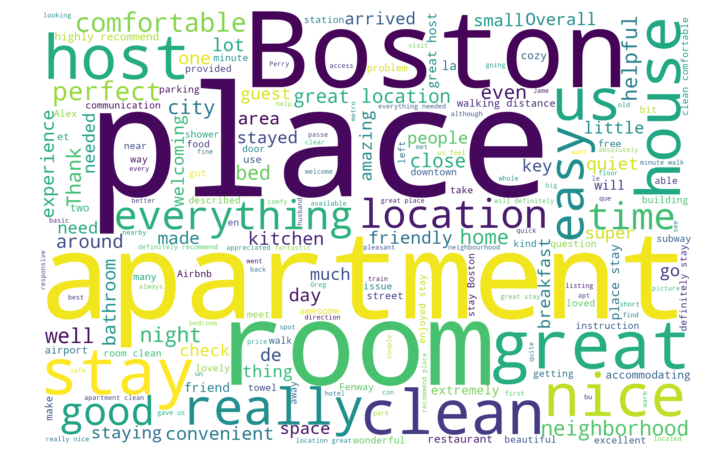

In [37]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Lisa", "Sean", "Brian", "Izzy"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width = 1800, height = 1200).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()